<a href="https://colab.research.google.com/github/Gauravsaha-97/Exploratory_Data_Analysis/blob/master/Udacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Project: Exploratory Data Analysis using Python</b>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#conclusions">Limitations</a></li>
</ul>

<a id='intro'></a>
## <b>Introduction</b>
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<ul>
<li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
<li>‘Neighborhood’ indicates the location of the hospital.</li>
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## <b>Questions to be addressed in this Project</b>
<ol>
<li>What is the distribution of Males and Females in out dataset?</li>
<li>What proportion of Females have Hipertension?</li>
<li>What proportion of males have hipertension?</li>
<li>What is the distribution of age of the patients in out dataset?</li>
<li>How many patients miss their scheduled appointments?</li>
<li>Is the gap between the Scheduled Day and Appointment Day (i.e delay) has any significant impact upon the attending/missing appointments?</li>
<li>What is the impact of receiving of SMS on attending/missing appointments?</li>
<li>What proportion of Male and Female are enrolled in the Scholarship Program?</li>
<li>What proportion of Scholarship enrolled people got SMS of appointment?</li>
<li>From which place does maximum number of patients belong to?</li>
<li>What percent of patients from Jardim Camburi showed up?</li>
<li>Are more males enrolled in the Scholarship Programme from Jardim Camburi?</li>
<li>From which diaeases people of Jardim Camburi mainly suffer from?</li>
<li>How each features are correlated in the main dataset?</li>
<li>How each features are correlated in the Jardim Camburi dataset?</li>
</ol>


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleaing the data and conduct exploratory data analysis to determine which features are conclusive to predict the target.


In [3]:
# Read Data using Pandas and store the data in the Dataframe "appointment_dataset"
appointment_dataset = pd.read_csv("KaggleV2-May-2016.csv")
appointment_dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### The Age column contains a negative value, which is absurd. So, I am going to apply a lambda function which returns 0 if any value is negative and returns the value otherwise

In [14]:
appointment_dataset['Age'] = appointment_dataset['Age'].apply(lambda x: 0 if x<0 else x)
appointment_dataset['Age']<0

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Name: Age, Length: 110527, dtype: bool

In [15]:
# Collecting information about the dataset
appointment_dataset.shape

(110527, 14)

There are 14 features and 110527 rows in our data

In [16]:
appointment_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no null values in our dataset. However, we will investigate this furthur. 


In [17]:
appointment_dataset.duplicated().sum()

0

There are no duplicated data in out dataset.

In [18]:
# Converting 'ScheduleDay' and 'AppointmentDay' to Datetime object
appointment_dataset['ScheduledDay'] = pd.to_datetime(appointment_dataset['ScheduledDay'])
appointment_dataset['AppointmentDay'] = pd.to_datetime(appointment_dataset['AppointmentDay'])

In [19]:
appointment_dataset.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

There are no null values in our dataset.
Now, the 'PatiendId' and 'AppointmentId' columns are unique for all indivisuals and hence totally irrevelant to run EDA. So, we drop those columns

In [20]:
appointment_dataset.drop(['PatientId','AppointmentID'], axis = 1, inplace = True)
appointment_dataset.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We create a column 'Days_Gap' which records the number of days between the Scheduled Day and Appointment day

In [21]:
appointment_dataset['Days_Gap'] = ((appointment_dataset['AppointmentDay']-appointment_dataset['ScheduledDay']).dt.days)+1
appointment_dataset.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days_Gap
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


##<b>Exploratory Data Analysis

# <b>What is the distribution of Males and Females in out dataset?</b>


In [22]:
gender_distribution = appointment_dataset['Gender'].value_counts()
print(gender_distribution)

F    71840
M    38687
Name: Gender, dtype: int64


There are 71840 females and 38387 males in our dataset. Lets found out the proportion of them

In [23]:
gender_proportion = appointment_dataset['Gender'].value_counts()/appointment_dataset.shape[0]
print(gender_proportion)

F    0.649977
M    0.350023
Name: Gender, dtype: float64


64.99% are Females and 35.00% are males in our dataset

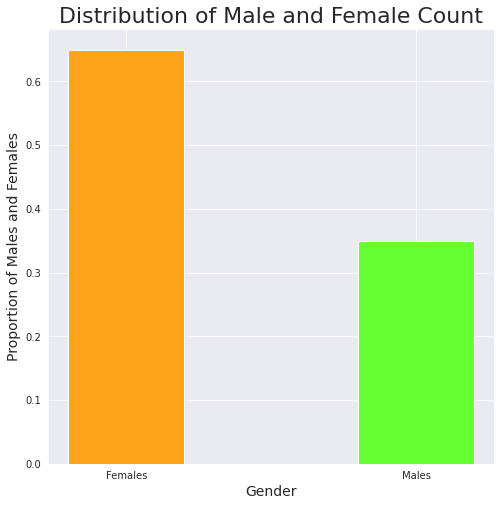

In [62]:
# Distribution of Males and Females (Single Variable Analysis)
sns.set_style('darkgrid')
plt.figure(figsize = (8,8))
location = [1,2]
height = [gender_proportion[0],gender_proportion[1]]
labels = ['Females', 'Males']
color = ['#ffa31a','#66ff33']
plt.bar(location, height, tick_label = labels, color=color, width = 0.4)
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Proportion of Males and Females', fontsize = 14)
plt.title('Distribution of Male and Female Count', fontsize=22)
plt.show()

## <b>How many people got notified by SMS?

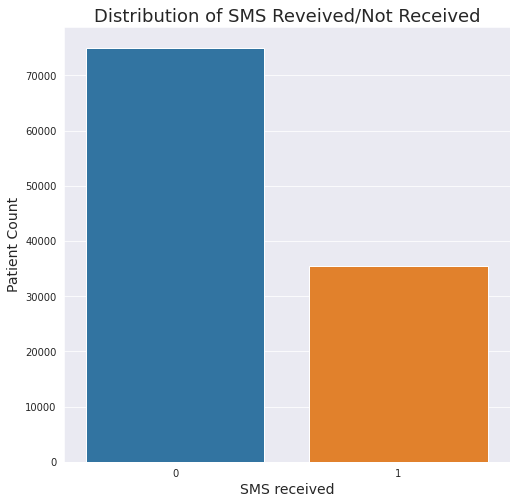

In [61]:
# Single Variablw Analysis
sns.set_style('darkgrid')
plt.figure(figsize = (8,8))
sns.countplot(x='SMS_received', data=appointment_dataset)
plt.xlabel('SMS received', fontsize=14)
plt.ylabel('Patient Count', fontsize=14)
plt.title('Distribution of SMS Reveived/Not Received', fontsize = 18)
plt.show()

## <b>What proportion of Females have Hipertension?
## What proportion of males have hipertension?</b>

In [25]:
# Get the value counts of hipertension patients group by Gender
hipertension_count = appointment_dataset.groupby('Gender')['Hipertension'].value_counts()
hipertension_count

Gender  Hipertension
F       0               56501
        1               15339
M       0               32225
        1                6462
Name: Hipertension, dtype: int64

56501 Females have hipertension and 6462 Males have hipertension

In [26]:
print("Proportion of Female Hipertension Patients = {}".format(hipertension_count[1]/gender_distribution[0]))
print("Proportion of Male Hipertension Patients = {}".format(hipertension_count[3]/gender_distribution[1]))

Proportion of Female Hipertension Patients = 0.21351614699331847
Proportion of Male Hipertension Patients = 0.1670328534132913


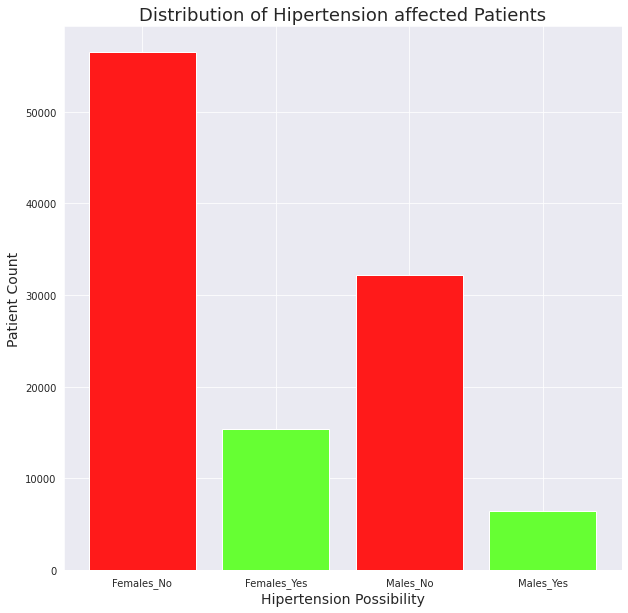

In [63]:
# Distribution of Male and Female Hipertension Patients
sns.set_style('darkgrid')
plt.figure(figsize = (10,10))
location = [1,2,3,4]
height = [hipertension_count[0],hipertension_count[1], hipertension_count[2], hipertension_count[3]]
labels = ['Females_No', 'Females_Yes','Males_No', 'Males_Yes']
color = ['#ff1a1a','#66ff33','#ff1a1a','#66ff33']
plt.bar(location, height, tick_label = labels, color=color)
plt.xlabel('Hipertension Possibility', fontsize=14)
plt.ylabel('Patient Count', fontsize = 14)
plt.title('Distribution of Hipertension affected Patients', fontsize=18)
plt.show()

## <b>What is the distribution of age of the patients in out dataset?</b>
To show the distribution, we create a column 'Age_Standarized' which shows the Standarized age of the patients.

In [28]:
appointment_dataset['Age_Standarized'] = (appointment_dataset['Age']-appointment_dataset['Age'].mean())/appointment_dataset['Age'].std()
appointment_dataset.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days_Gap,Age_Standarized
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1.077928
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0.818302
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1.077928
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,-1.258704
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0.818302


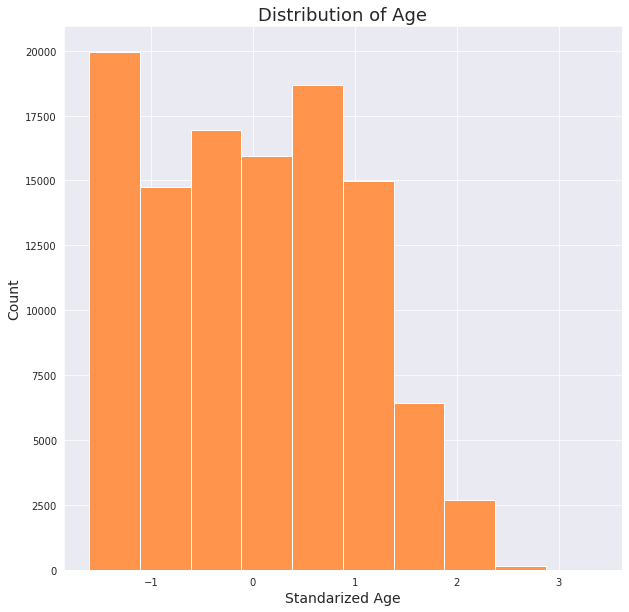

In [64]:
# Distribution of ages (Single Variable Analysis)
sns.set_style('darkgrid')
plt.figure(figsize = (10,10))
appointment_dataset['Age_Standarized'].hist(color='#ff944d')
plt.xlabel('Standarized Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Age', fontsize=18)
plt.show()

## <b>How many patients miss their scheduled appointments?</b>

In [30]:
appointment_miss = appointment_dataset.groupby('Gender')['No-show'].value_counts()
appointment_miss

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

In [31]:
female_attend = appointment_miss[0]/gender_distribution[0]
female_miss = appointment_miss[1]/gender_distribution[0]
male_attend = appointment_miss[2]/gender_distribution[1]
male_miss = appointment_miss[3]/gender_distribution[1]
print("{} % of Females miss their appointments and {} % of males miss their appointments".format(female_miss*100, male_miss*100))

20.31458797327394 % of Females miss their appointments and 19.967947889471915 % of males miss their appointments


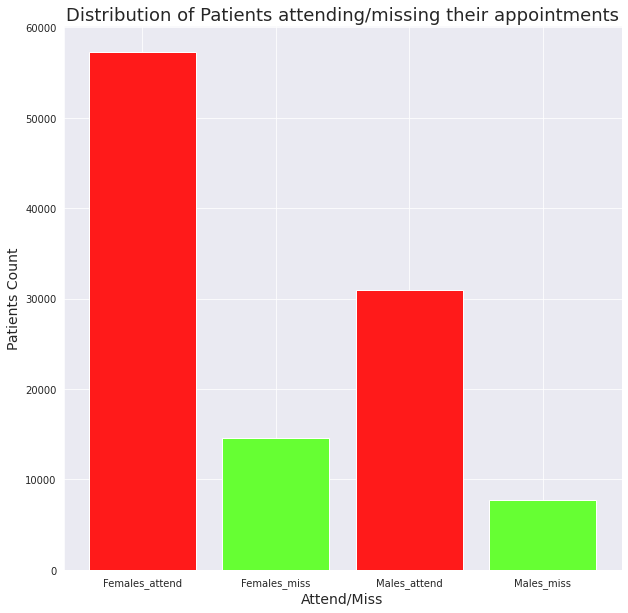

In [66]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,10))
location = [1,2,3,4]
height = [appointment_miss[0],appointment_miss[1], appointment_miss[2], appointment_miss[3]]
labels = ['Females_attend', 'Females_miss','Males_attend', 'Males_miss']
color = ['#ff1a1a','#66ff33','#ff1a1a','#66ff33']
plt.bar(location, height, tick_label = labels, color=color)
plt.xlabel('Attend/Miss', fontsize=14)
plt.ylabel('Patients Count', fontsize = 14)
plt.title('Distribution of Patients attending/missing their appointments', fontsize=18)
plt.show()

## <b>Is the gap between the Scheduled Day and Appointment Day (i.e delay) has any significant impact upon the attending/missing appointments?</b>

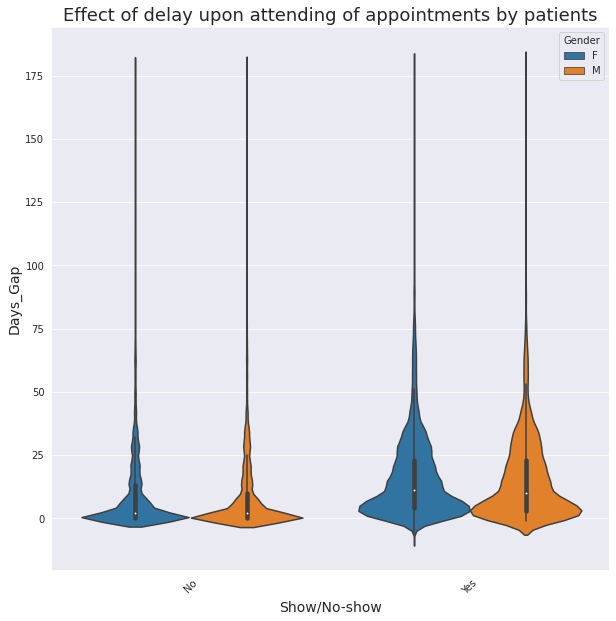

In [67]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,10))
sns.violinplot(y='Days_Gap', x='No-show', hue='Gender', data=appointment_dataset)
plt.xticks(rotation = 45)
plt.xlabel('Show/No-show', fontsize=14)
plt.ylabel('Days_Gap', fontsize=14)
plt.title('Effect of delay upon attending of appointments by patients', fontsize=18)
plt.show()

From the plot, when the delay is between 25-50 days, there is significantly large number of patients not showing up. When the number of Days_Gap is in the range 50-75, there is small difference in the number of patients(both male and female) not showing up, as compared to showing up. Generally, when the delay is 0 days, maximum patients show up.

## <b>What is the impact of receiving of SMS on attending/missing appointments?</b>

In [34]:
sms_attend = appointment_dataset.groupby('SMS_received')['No-show'].value_counts()
sms_attend

SMS_received  No-show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: No-show, dtype: int64

In [35]:
print("{} % of patients showed up even after not receiving SMS".format((sms_attend[0][0]/appointment_dataset.shape[0])*100))
print("{} % of patients doesnot showed up after not receiving SMS".format((sms_attend[0][1]/appointment_dataset.shape[0])*100))
print("{} % of patients showed up after receiving SMS".format((sms_attend[2]/appointment_dataset.shape[0])*100))
print("{} % of patients doesnot showed up even after receiving SMS".format((sms_attend[3]/appointment_dataset.shape[0])*100))

56.5563165561356 % of patients showed up even after not receiving SMS
11.341120269255477 % of patients doesnot showed up after not receiving SMS
23.250427497353588 % of patients showed up after receiving SMS
8.852135677255331 % of patients doesnot showed up even after receiving SMS


In [36]:
# Attending/Missing the appointment based on 'SMS received' in Tabular Form
cross_tab = pd.crosstab(index=appointment_dataset['SMS_received'], columns=appointment_dataset['No-show'])
cross_tab

No-show,No,Yes
SMS_received,,
0,62510,12535
1,25698,9784


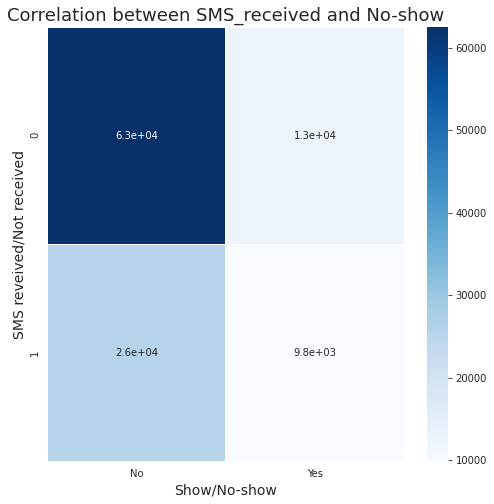

In [69]:
# Heatmap plot of the Table
plt.figure(figsize=(8,8))
sns.heatmap(cross_tab,linewidths=0.5, cmap='Blues', annot=True)
plt.xlabel('Show/No-show', fontsize=14)
plt.ylabel('SMS reveived/Not received', fontsize=14)
plt.title('Correlation between SMS_received and No-show',fontsize=18)
plt.show()

## <b>What proportion of Male and Female are enrolled in the Scholarship Program?

In [39]:
scholarship_gender = appointment_dataset.groupby('Gender')['Scholarship'].value_counts()
scholarship_gender

Gender  Scholarship
F       0              62987
        1               8853
M       0              36679
        1               2008
Name: Scholarship, dtype: int64

In [40]:
print("{} % of females are enrolled in the Scholarship Programme".format((scholarship_gender[1]/gender_distribution[0])*100))
print("{} % of males are enrolled in the Scholarship Programme".format((scholarship_gender[3]/gender_distribution[0])*100))
print("{} % of patients got enrolled in Scholarship Programme".format(((scholarship_gender[1]+scholarship_gender[3])/appointment_dataset.shape[0])*100))

12.323218262806236 % of females are enrolled in the Scholarship Programme
2.7951002227171493 % of males are enrolled in the Scholarship Programme
9.826558216544374 % of patients got enrolled in Scholarship Programme


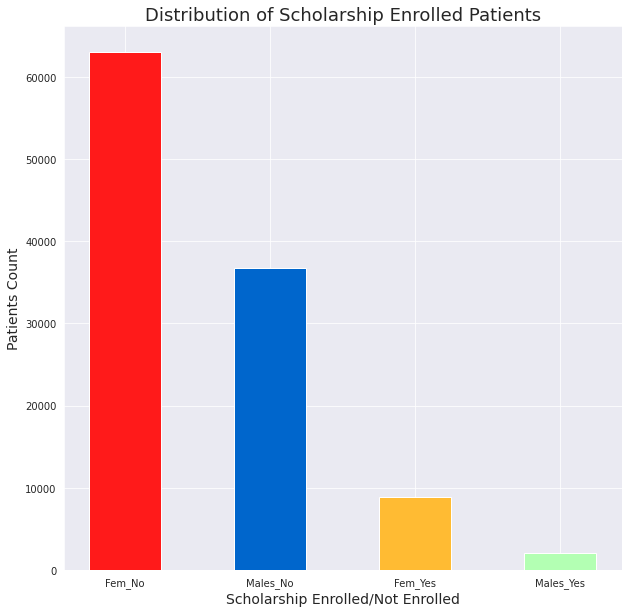

In [71]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,10))
location = [1,2,3,4]
height = [scholarship_gender[0],scholarship_gender[2],scholarship_gender[1],scholarship_gender[3]]
labels = ['Fem_No', 'Males_No','Fem_Yes', 'Males_Yes']
color = ['#ff1a1a','#0066cc','#ffbb33','#b3ffb3']
plt.bar(location, height, tick_label = labels, color=color, width=0.5)
plt.xlabel('Scholarship Enrolled/Not Enrolled', fontsize=14)
plt.ylabel('Patients Count', fontsize = 14)
plt.title('Distribution of Scholarship Enrolled Patients', fontsize=18)
plt.show()

From the plot, it is evident that very small number of males are enrolled in the Programme.

## <b>What proportion of Scholarship enrolled people got SMS of appointment?</b>

In [42]:
scholarship_SMS = appointment_dataset.groupby('Scholarship')['SMS_received'].value_counts()
scholarship_SMS

Scholarship  SMS_received
0            0               67689
             1               31977
1            0                7356
             1                3505
Name: SMS_received, dtype: int64

In [43]:
sch_enrld = scholarship_SMS[2]+scholarship_SMS[3]
sch_unenrld = scholarship_SMS[0][0]+scholarship_SMS[0][1]
print("{} % of Scholarship enrolled people got SMS".format((scholarship_SMS[3]/sch_enrld)*100))
print("{} % of Sholarship unenrolled people doesnot get SMS".format((scholarship_SMS[0][0]/sch_unenrld)*100))

32.27142988675076 % of Scholarship enrolled people got SMS
67.91583890193246 % of Sholarship unenrolled people doesnot get SMS


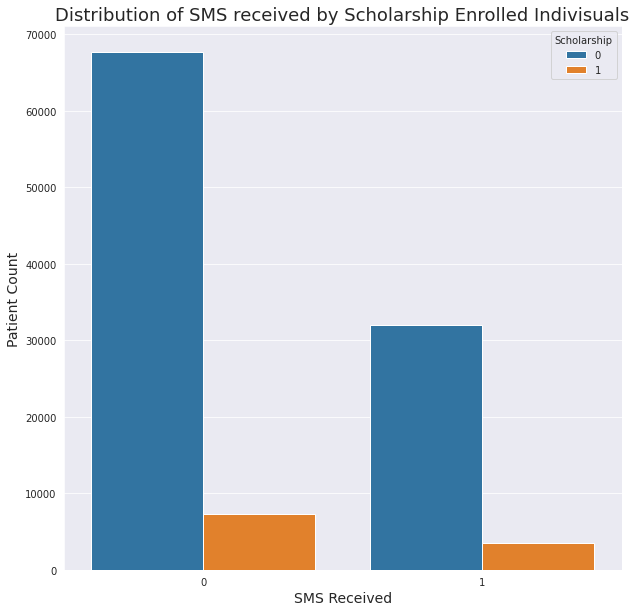

In [72]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,10))
sns.countplot(x='SMS_received', hue='Scholarship', data=appointment_dataset)
plt.xlabel('SMS Received', fontsize = 14)
plt.ylabel('Patient Count', fontsize=14)
plt.title('Distribution of SMS received by Scholarship Enrolled Indivisuals', fontsize=18)
plt.show()

From the plot, it is evident that out of all patients who are enrolled in scholarship program, number of patients got SMS is less than number of patients who doesnot get SMS. 

##<b>From which place does maximum number of patients belong to?

In [45]:
appointment_dataset['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

So, maximum patients are from JARDIM CAMBURI.
Now we are going to analyze the data of patints who are from JARDIM CAMBURI, as maximum patients are from there.

In [46]:
# Make a seperate dataframe containing the records of the patients from Jardim Camburi

jardim_camburi_data = appointment_dataset[appointment_dataset['Neighbourhood']=='JARDIM CAMBURI']
jardim_camburi_data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days_Gap,Age_Standarized
72,F,2016-04-29 07:37:37+00:00,2016-04-29 00:00:00+00:00,61,JARDIM CAMBURI,0,0,0,0,0,0,No,0,1.034657
398,F,2016-04-28 16:52:04+00:00,2016-04-29 00:00:00+00:00,43,JARDIM CAMBURI,0,0,0,0,0,0,No,1,0.255780
444,M,2016-04-15 14:22:02+00:00,2016-04-29 00:00:00+00:00,13,JARDIM CAMBURI,0,0,0,0,0,1,No,14,-1.042349
445,F,2016-04-14 11:01:47+00:00,2016-04-29 00:00:00+00:00,65,JARDIM CAMBURI,0,1,0,0,0,1,No,15,1.207741
446,F,2016-04-08 14:13:23+00:00,2016-04-29 00:00:00+00:00,60,JARDIM CAMBURI,0,0,0,0,0,1,Yes,21,0.991386


In [47]:
print("The dataset contains {} rows and {} columns".format(jardim_camburi_data.shape[0], jardim_camburi_data.shape[1]))

The dataset contains 7717 rows and 14 columns


##<b>What percent of patients from Jardim Camburi showed up?

In [48]:
attend = jardim_camburi_data['No-show'].value_counts()[0]
miss =  jardim_camburi_data['No-show'].value_counts()[1]
print("{} % of patients from Jardim Camburi showed up".format((attend/jardim_camburi_data.shape[0])*100))
print("{} % of patients from Jardim Camburi didnot show up".format((miss/jardim_camburi_data.shape[0])*100))

81.01593883633537 % of patients from Jardim Camburi showed up
18.984061163664638 % of patients from Jardim Camburi didnot show up


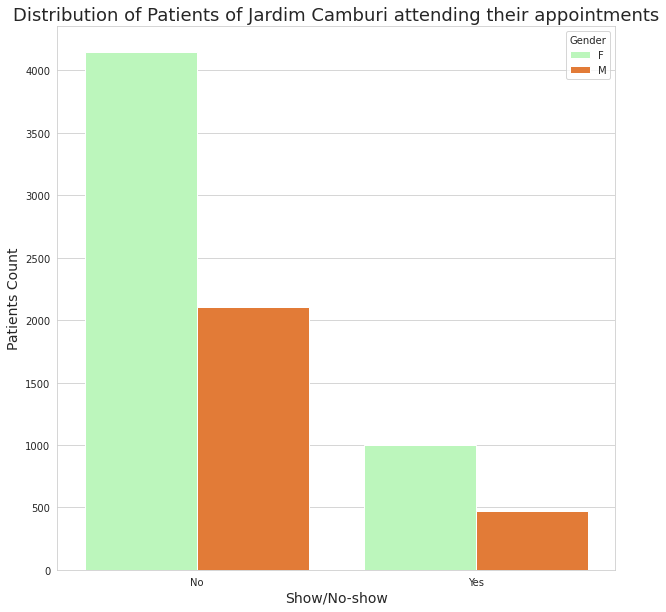

In [73]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,10))
sns.countplot(x='No-show',hue='Gender' ,data=jardim_camburi_data, palette=['#b3ffb3','#ff751a'])
plt.xlabel('Show/No-show', fontsize=14)
plt.ylabel('Patients Count',fontsize=14)
plt.title("Distribution of Patients of Jardim Camburi attending their appointments", fontsize=18)
plt.show()

From the plot, large percent of Females attended the appointment than males.

## <b>Are more males enrolled in the Scholarship Programme from Jardim Camburi?

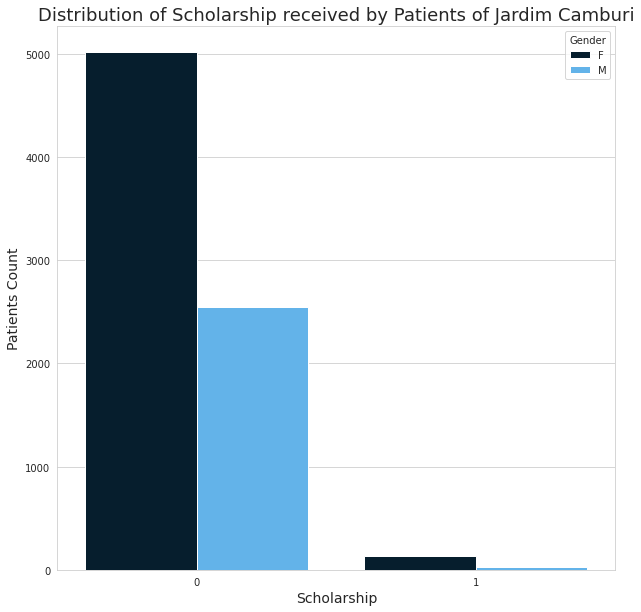

In [74]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,10))
sns.countplot(x='Scholarship', data=jardim_camburi_data, hue='Gender',palette=['#001f33','#4db8ff'])
plt.xlabel('Scholarship', fontsize=14)
plt.ylabel('Patients Count',fontsize=14)
plt.title("Distribution of Scholarship received by Patients of Jardim Camburi", fontsize=18)
plt.show()

From the plot, very few patient are enrolled in the Scholarship programme, out of which, the female percentage is higher

## <b>From which diaeases people of Jardim Camburi mainly suffer from?</b>

To find out the answer, we create a seperate Dataframe containing all the disease data from the patients of Jardim Camburiand we will try to plot them on a single plot.

In [51]:
diseases_J = pd.DataFrame(data = jardim_camburi_data, columns = ['Hipertension',	'Diabetes',	'Alcoholism',	'Handcap'])
diseases_J.head()

,Hipertension,Diabetes,Alcoholism,Handcap
72,0,0,0,0
398,0,0,0,0
444,0,0,0,0
445,1,0,0,0
446,0,0,0,0


In [52]:
dis_melt = pd.melt(diseases_J)
dis_melt

,variable,value
0,Hipertension,0
1,Hipertension,0
2,Hipertension,0
3,Hipertension,1
4,Hipertension,0
...,...,...
30863,Handcap,0
30864,Handcap,0
30865,Handcap,0
30866,Handcap,0


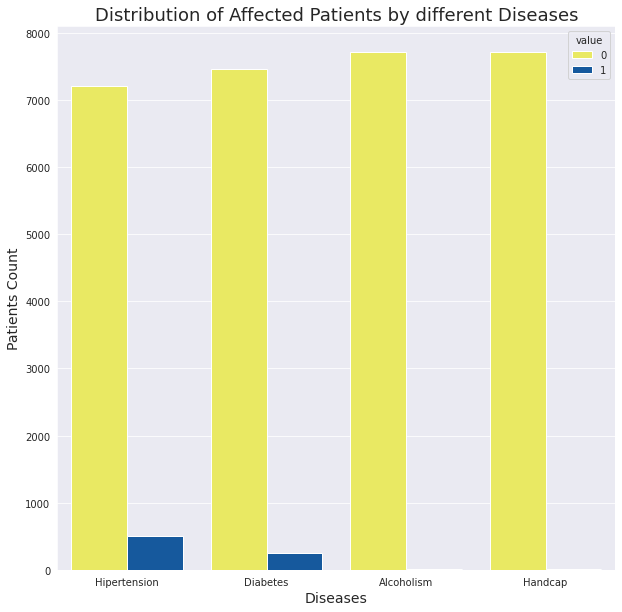

In [75]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,10))
sns.countplot(data=dis_melt, x='variable', hue='value',palette=['#ffff4d','#0059b3'],)
plt.xlabel('Diseases', fontsize=14)
plt.ylabel('Patients Count', fontsize=14)
plt.title('Distribution of Affected Patients by different Diseases', fontsize=18)
plt.show();

From the plot, it is clear that the people of Jardim Camburi mainly suffer from two problems, Hipertension and Diabetes.

## <b>How each features are correlated in the main dataset?</b>

In [54]:
appointment_correlation = appointment_dataset.corr()
print("The Correlation matrix of Appointment Dataset is: \n{}".format(appointment_correlation))

The Correlation matrix of Appointment Dataset is: 
                      Age  Scholarship  ...  Days_Gap  Age_Standarized
Age              1.000000    -0.092457  ...  0.034820         1.000000
Scholarship     -0.092457     1.000000  ... -0.030421        -0.092457
Hipertension     0.504586    -0.019729  ... -0.017215         0.504586
Diabetes         0.292392    -0.024894  ... -0.027188         0.292392
Alcoholism       0.095811     0.035022  ... -0.038519         0.095811
Handcap          0.078033    -0.008586  ... -0.019843         0.078033
SMS_received     0.012643     0.001194  ...  0.398145         0.012643
Days_Gap         0.034820    -0.030421  ...  1.000000         0.034820
Age_Standarized  1.000000    -0.092457  ...  0.034820         1.000000

[9 rows x 9 columns]


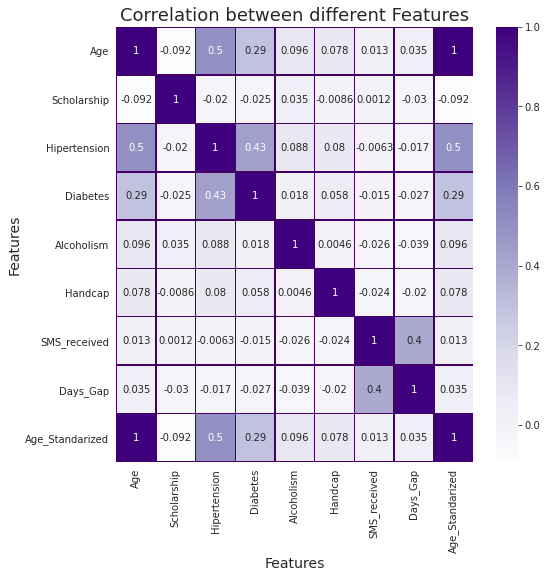

In [76]:
# Heatmap plot of Correlation Matrix
plt.figure(figsize=(8,8))
sns.heatmap(appointment_dataset.corr(), cmap='Purples',linecolor='#440066',linewidths=0.5, annot=True)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.title("Correlation between different Features", fontsize=18)
plt.show()

From the Heatmap plot, there is a high correlation between Hipertension and Age. Also, Hipertension and Diabetes aslo show a very good correlation.

## <b>How each features are correlated in the Jardim Camburi dataset?

In [56]:
jardim_correlation = jardim_camburi_data.corr()
print("The Correlation matrix of Appointment Dataset is: \n{}".format(jardim_correlation))

The Correlation matrix of Appointment Dataset is: 
                      Age  Scholarship  ...  Days_Gap  Age_Standarized
Age              1.000000    -0.068421  ...  0.046273         1.000000
Scholarship     -0.068421     1.000000  ... -0.009910        -0.068421
Hipertension     0.224243    -0.001791  ...  0.023756         0.224243
Diabetes         0.148019    -0.006025  ...  0.027548         0.148019
Alcoholism       0.010499    -0.005225  ... -0.004159         0.010499
Handcap          0.008791    -0.004046  ... -0.004308         0.008791
SMS_received     0.034869     0.011501  ...  0.448821         0.034869
Days_Gap         0.046273    -0.009910  ...  1.000000         0.046273
Age_Standarized  1.000000    -0.068421  ...  0.046273         1.000000

[9 rows x 9 columns]


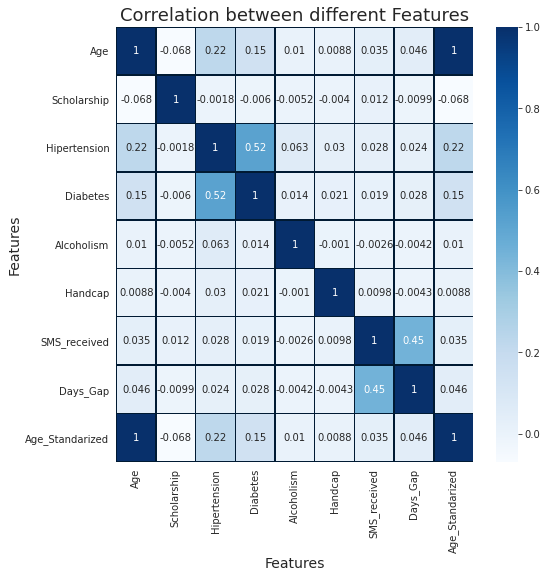

In [77]:
#Heatmap plot of Correlation Matrix
plt.figure(figsize=(8,8))
sns.heatmap(jardim_camburi_data.corr(), cmap='Blues',linecolor='#001a33',linewidths=0.5, annot=True)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.title("Correlation between different Features", fontsize=18)
plt.show()

Hypertension and Diabetes show very good correlation, whereas Scholarship and Age shows very poor correlation.

#<b>Conclusion</b>

<ul>
<li>Overall Distribution of gender: <b>64.99% are Females and 35.00% are males</b></li>
<li>The number of people got notified bt SMS is less as compared to not got notified</li>
<li>The number of Hipertension affected Females are more as compared to males</li>
<li>More females miss their appointments as compared to males</li>
<li>From the plot, when the delay is between 25-50 days, there is significantly large number of patients not showing up. When the number of Days_Gap is in the range 50-75, there is small difference in the number of patients(both male and female) not showing up, as compared to showing up. Generally, when the delay is 0 days, maximum patients show up.</li>
<li>Very small number of males are enrolled in the Scholarship Programme as compared to Female.</li>
<li>ut of all patients who are enrolled in scholarship program, number of patients got SMS is less than number of patients who doesnot get SMS.</li>
<li>In Jardim Camburi, very few patient are enrolled in the Scholarship programme, out of which, the female percentage is higher</li>
<li>The people of Jardim Camburi mainly suffer from two problems, <b>Hipertension and Diabetes.</b></li>


#<b>Limitations</b>
<ul>
<li>Informtion about distance between the Clinic and the place of residence of patients will help to analyse the data better. Otherwise, the size of the dataset is sufficient enough to answer the questions adressed in this project</li>
</ul>